# Ensemble Classifiers

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

In [2]:
# datasets
X_train = pd.read_csv('.\data\csv_data\X_TR_561_SENZA_OUTLIERS.csv')
X_test = pd.read_csv('.\data\csv_data\X_test.csv')
y_train = pd.read_csv('.\data\csv_data\Y_TR_561_SENZA_OUTLIERS.csv')
y_test = pd.read_csv('.\data\csv_data\y_test.csv')

In [3]:
# Target variable from integer to categorical
y_train['Label'] = pd.Categorical(y_train["Label"])
y_test['Label'] = pd.Categorical(y_test["Label"])

In [4]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (7278, 561)
y_train:  (7278, 1)
X_test:  (2947, 561)
y_test:  (2947, 1)


# RANDOM FOREST

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
# clf random forest
clf = RandomForestClassifier()

# k folds per cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# parametri per grid search
param_list = {'max_depth': [3, 5, 10, 15, 20],
             'n_estimators': [50, 100, 150, 200]}

# grid search
grid_search = GridSearchCV(clf, param_grid=param_list, cv=kf)
grid_search.fit(X_train, y_train)

# results of the grid search
res = grid_search.cv_results_

In [10]:
# funzione del tutor per printare i risultati
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [11]:
# best parameter combinations
report(res, n_top=10)

Model with rank: 1
Mean validation score: 0.982 (std: 0.003)
Parameters: {'max_depth': 20, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.981 (std: 0.005)
Parameters: {'max_depth': 20, 'n_estimators': 150}

Model with rank: 3
Mean validation score: 0.980 (std: 0.003)
Parameters: {'max_depth': 20, 'n_estimators': 200}

Model with rank: 4
Mean validation score: 0.979 (std: 0.003)
Parameters: {'max_depth': 15, 'n_estimators': 200}

Model with rank: 5
Mean validation score: 0.979 (std: 0.004)
Parameters: {'max_depth': 15, 'n_estimators': 150}

Model with rank: 6
Mean validation score: 0.978 (std: 0.003)
Parameters: {'max_depth': 20, 'n_estimators': 50}

Model with rank: 7
Mean validation score: 0.978 (std: 0.005)
Parameters: {'max_depth': 15, 'n_estimators': 100}

Model with rank: 8
Mean validation score: 0.976 (std: 0.004)
Parameters: {'max_depth': 15, 'n_estimators': 50}

Model with rank: 9
Mean validation score: 0.975 (std: 0.004)
Parameters: {'max_depth': 10, 'n_esti

In [41]:
# RF 
clf = RandomForestClassifier(n_estimators=100 ,max_depth=20, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('')
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.89      0.97      0.93       496
           2       0.89      0.90      0.90       471
           3       0.97      0.85      0.90       420
           4       0.92      0.88      0.90       491
           5       0.89      0.92      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.92      2947



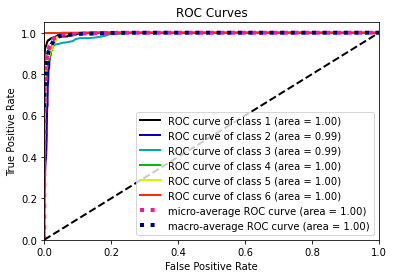

In [22]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

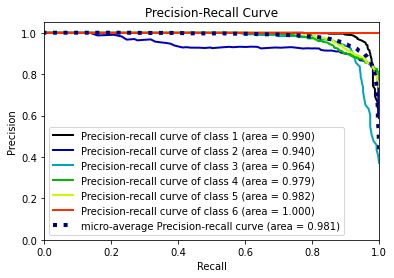

In [23]:
plot_precision_recall(y_test, y_score)
plt.show()

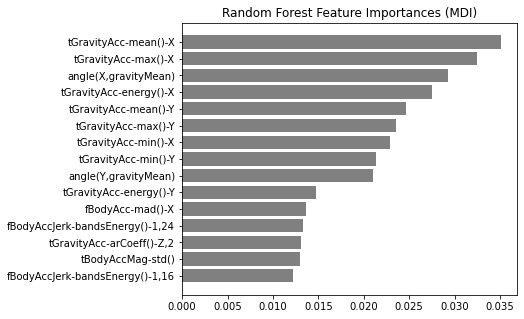

In [54]:
# Plotting the most important features the trees splitted on
nbr_features = 15
tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))

plt.figure(figsize=(6,5))
plt.barh(y_ticks, tree_feature_importances[sorted_idx], color='grey')
plt.yticks(y_ticks, np.array(X_train.columns)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

# Gini Importance or Mean Decrease in Impurity (MDI) calculates each feature importance as the sum over the number of splits (across all tress) 
# that include the feature, proportionally to the number of samples it splits.

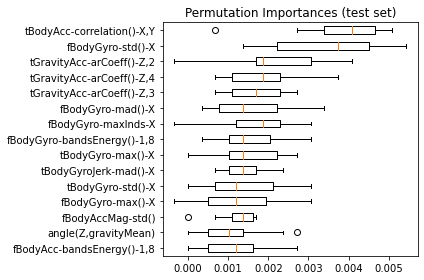

In [25]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()[-nbr_features:]

plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(X_train.columns)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

# BAGGING

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

> class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

se None, il classificatore è un albero con max_depth=1

In [34]:
# clf random forest
clf = BaggingClassifier(DecisionTreeClassifier())

# k folds per cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# parametri per grid search
param_list = {
    'base_estimator__max_depth' : [1, 3, 5],
    'n_estimators': [10, 50, 100]
}

# grid search
grid_search = GridSearchCV(clf, param_grid=param_list, cv=kf)
grid_search.fit(X_train, y_train)

# results of the grid search
res = grid_search.cv_results_

In [35]:
report(res, n_top=10)

Model with rank: 1
Mean validation score: 0.925 (std: 0.010)
Parameters: {'base_estimator__max_depth': 5, 'n_estimators': 50}

Model with rank: 2
Mean validation score: 0.923 (std: 0.007)
Parameters: {'base_estimator__max_depth': 5, 'n_estimators': 100}

Model with rank: 3
Mean validation score: 0.920 (std: 0.006)
Parameters: {'base_estimator__max_depth': 5, 'n_estimators': 10}

Model with rank: 4
Mean validation score: 0.788 (std: 0.007)
Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 10}

Model with rank: 5
Mean validation score: 0.788 (std: 0.007)
Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 100}

Model with rank: 6
Mean validation score: 0.787 (std: 0.006)
Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 50}

Model with rank: 7
Mean validation score: 0.378 (std: 0.012)
Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 10}

Model with rank: 7
Mean validation score: 0.378 (std: 0.012)
Parameters: {'base_estimator__max_depth': 1, 'n_

In [40]:
clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.96      0.92       496
           2       0.89      0.85      0.87       471
           3       0.93      0.87      0.90       420
           4       0.88      0.80      0.84       491
           5       0.83      0.90      0.86       532
           6       1.00      1.00      1.00       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



In [28]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.98      0.94       496
           2       0.90      0.92      0.91       471
           3       0.96      0.84      0.89       420
           4       0.91      0.89      0.90       491
           5       0.90      0.92      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.93      2947
weighted avg       0.93      0.93      0.93      2947



In [6]:
# datasets per SVC
X_train_151 = pd.read_csv('.\data\csv_data\X_TR_151_SENZA_OUTLIERS.csv')
X_test_151 = pd.read_csv('.\data\csv_data\X_TST_151_SENZA_OUTLIERS.csv')
y_train_151 = pd.read_csv('.\data\csv_data\Y_TR_151_SENZA_OUTLIERS.csv')
y_test_151 = pd.read_csv('.\data\csv_data\y_test.csv')

y_train_151['Label'] = pd.Categorical(y_train_151["Label"])
y_test_151['Label'] = pd.Categorical(y_test_151["Label"])

In [7]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

clf = BaggingClassifier(base_estimator=SVC(C=1.0), n_estimators=10, random_state=42)
clf.fit(X_train_151, y_train_151)

y_pred = clf.predict(X_test_151)

print(classification_report(y_test_151, y_pred))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97       496
           2       0.95      0.92      0.94       471
           3       0.97      0.94      0.96       420
           4       0.94      0.90      0.92       491
           5       0.91      0.94      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



In [10]:
clf = BaggingClassifier(base_estimator=LinearSVC(C=100), n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97       496
           2       0.98      0.95      0.96       471
           3       1.00      0.98      0.99       420
           4       0.97      0.87      0.92       491
           5       0.90      0.98      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [8]:
clf = BaggingClassifier(base_estimator=LinearSVC(C=1000), n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97       496
           2       0.98      0.95      0.96       471
           3       1.00      0.98      0.99       420
           4       0.97      0.88      0.92       491
           5       0.91      0.97      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



# BOOSTING 

In [9]:
from sklearn.ensemble import AdaBoostClassifier

>class sklearn.ensemble.AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)

se None, il classificatore è un albero con max_depth=1

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15), n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       496
           2       0.90      0.93      0.92       471
           3       0.96      0.89      0.92       420
           4       0.95      0.86      0.90       491
           5       0.88      0.95      0.92       532
           6       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.93      0.94      2947
weighted avg       0.94      0.94      0.94      2947



In [12]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.36      1.00      0.53       496
           2       0.00      0.00      0.00       471
           3       0.00      0.00      0.00       420
           4       0.00      0.00      0.00       491
           5       0.52      1.00      0.68       532
           6       1.00      1.00      1.00       537

    accuracy                           0.53      2947
   macro avg       0.31      0.50      0.37      2947
weighted avg       0.34      0.53      0.39      2947



In [32]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.97      0.94       496
           2       0.88      0.92      0.90       471
           3       0.97      0.84      0.90       420
           4       0.91      0.89      0.90       491
           5       0.90      0.92      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.93      2947
weighted avg       0.93      0.93      0.93      2947

